In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hermanus za
skjervoy no
oil city us
vaini to
kosh-agach ru
georgetown sh
chatrapur in
mount gambier au
tasbuget kz
sur om
preobrazheniye ru
kapaa us
ushuaia ar
tuktoyaktuk ca
moron mn
barentsburg sj
marawi sd
sapulpa us
rikitea pf
hermanus za
punta arenas cl
surat thani th
berdigestyakh ru
rikitea pf
sekoma bw
walvis bay na
umzimvubu za
mataura pf
kapaa us
hay river ca
arraial do cabo br
kavaratti in
taolanaro mg
castro cl
te anau nz
wahran dz
marcona pe
severo-kurilsk ru
diamantino br
rikitea pf
busselton au
zaoyang cn
sao gabriel da cachoeira br
marzuq ly
camacha pt
avarua ck
vila franca do campo pt
hanzhong cn
bredasdorp za
provideniya ru
norman wells ca
mataura pf
ostrovnoy ru
busselton au
touros br
taolanaro mg
ponnani in
hobyo so
yellowknife ca
yomou gn
amarante do maranhao br
kolokani ml
jamestown sh
vila franca do campo pt
busselton au
aliganj in
lingao cn
tapejara br
ternate id
barrow us
hobart au
biak id
bilibino ru
ponta do sol cv
punta arenas cl
pacific grove us
los llanos 

cidreira br
devonport au
kapaa us
bredasdorp za
bethel us
punta arenas cl
tautira pf
kenai us
punta arenas cl
portland au
kenai us
camana pe
illoqqortoormiut gl
rikitea pf
kalakamati bw
amderma ru
ketchikan us
taolanaro mg
plettenberg bay za
punta arenas cl
eastbourne gb
ust-kamchatsk ru
the valley ai
port blair in
barentsburg sj
bambous virieux mu
olafsvik is
raudeberg no
georgetown sh
kapaa us
abu samrah qa
mehamn no
hualmay pe
hobart au
mayo ca
belushya guba ru
saint-philippe re
kapaa us
albany au
buala sb
mys shmidta ru
ekangala za
tura ru
puerto ayora ec
khaniotis gr
tiksi ru
arraial do cabo br
yumen cn
okmulgee us
port elizabeth za
pachino it
new norfolk au
krasnoselkup ru
butaritari ki
ostrovnoy ru
coihaique cl
rikitea pf
cape town za
ushuaia ar
mezen ru
bathsheba bb
broome au
castro cl
bethel us
busselton au
bilma ne
cherskiy ru
illoqqortoormiut gl
rio cuarto ar
shimoda jp
busselton au
rikitea pf
catalina foothills us
margherita in
puerto ayora ec
barrow us
lima pe
cherskiy ru


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [10]:
import requests
requests.__version__

'2.25.1'

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | hermanus
Processing Record 2 of Set 13 | skjervoy
Processing Record 3 of Set 13 | oil city
Processing Record 4 of Set 13 | vaini
Processing Record 5 of Set 13 | kosh-agach
Processing Record 6 of Set 13 | georgetown
Processing Record 7 of Set 13 | chatrapur
Processing Record 8 of Set 13 | mount gambier
Processing Record 9 of Set 13 | tasbuget
City not found. Skipping...
Processing Record 10 of Set 13 | sur
Processing Record 11 of Set 13 | preobrazheniye
Processing Record 12 of Set 13 | kapaa
Processing Record 13 of Set 13 | ushuaia
Processing Record 14 of Set 13 | tuktoyaktuk
Processing Record 15 of Set 13 | moron
Processing Record 16 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 13 | marawi
Processing Record 18 of Set 13 | sapulpa
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | punta arenas
Processing Record 21 of Set 13 | surat thani
P

Processing Record 33 of Set 16 | the pas
Processing Record 34 of Set 16 | faanui
Processing Record 35 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 16 | tual
Processing Record 37 of Set 16 | dambovicioara
Processing Record 38 of Set 16 | atuona
Processing Record 39 of Set 16 | dingle
Processing Record 40 of Set 16 | brae
Processing Record 41 of Set 16 | port lincoln
Processing Record 42 of Set 16 | kamaishi
Processing Record 43 of Set 16 | meyungs
City not found. Skipping...
Processing Record 44 of Set 16 | kruisfontein
Processing Record 45 of Set 16 | villalba
Processing Record 46 of Set 16 | albany
Processing Record 47 of Set 16 | moindou
Processing Record 48 of Set 16 | evensk
Processing Record 49 of Set 16 | halifax
Processing Record 50 of Set 16 | artyk
City not found. Skipping...
Processing Record 1 of Set 17 | lazaro cardenas
Processing Record 2 of Set 17 | moffat
Processing Record 3 of Set 17 | lai
Processing Record 4 of Set 17 | ranfurly
Proce

Processing Record 16 of Set 20 | taoudenni
Processing Record 17 of Set 20 | santa isabel
Processing Record 18 of Set 20 | orlik
Processing Record 19 of Set 20 | pevek
Processing Record 20 of Set 20 | devonport
Processing Record 21 of Set 20 | tautira
Processing Record 22 of Set 20 | kenai
Processing Record 23 of Set 20 | portland
Processing Record 24 of Set 20 | camana
Processing Record 25 of Set 20 | kalakamati
Processing Record 26 of Set 20 | ketchikan
Processing Record 27 of Set 20 | plettenberg bay
Processing Record 28 of Set 20 | eastbourne
Processing Record 29 of Set 20 | ust-kamchatsk
City not found. Skipping...
Processing Record 30 of Set 20 | the valley
Processing Record 31 of Set 20 | olafsvik
Processing Record 32 of Set 20 | raudeberg
Processing Record 33 of Set 20 | abu samrah
Processing Record 34 of Set 20 | saint-philippe
Processing Record 35 of Set 20 | buala
Processing Record 36 of Set 20 | ekangala
Processing Record 37 of Set 20 | khaniotis
Processing Record 38 of Set 

Processing Record 7 of Set 24 | pisco
Processing Record 8 of Set 24 | luanda
Processing Record 9 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 24 | necochea
Processing Record 11 of Set 24 | tyrma
Processing Record 12 of Set 24 | chalisgaon
Processing Record 13 of Set 24 | acarau
Processing Record 14 of Set 24 | bastia
Processing Record 15 of Set 24 | manono
Processing Record 16 of Set 24 | namatanai
Processing Record 17 of Set 24 | pochutla
Processing Record 18 of Set 24 | benguela
Processing Record 19 of Set 24 | ilulissat
Processing Record 20 of Set 24 | trapani
Processing Record 21 of Set 24 | mrirt
City not found. Skipping...
Processing Record 22 of Set 24 | kachiry
Processing Record 23 of Set 24 | sorvag
City not found. Skipping...
Processing Record 24 of Set 24 | awjilah
Processing Record 25 of Set 24 | russell
Processing Record 26 of Set 24 | oneonta
Processing Record 27 of Set 24 | formoso do araguaia
City not found. Skipping...
Processing Re

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,78.91,68,78,20.45,ZA,2021-11-21 14:02:10
1,Skjervoy,70.0311,20.9714,28.58,63,100,26.64,NO,2021-11-21 14:02:10
2,Oil City,41.4339,-79.7064,40.44,90,100,4.79,US,2021-11-21 13:59:55
3,Vaini,-21.2000,-175.2000,78.80,83,99,5.39,TO,2021-11-21 14:02:11
4,Kosh-Agach,50.0000,88.6667,7.14,63,51,2.66,RU,2021-11-21 14:02:11
5,Georgetown,5.4112,100.3354,80.53,92,40,0.00,MY,2021-11-21 14:02:11
6,Chatrapur,19.3500,84.9833,79.41,83,30,4.81,IN,2021-11-21 14:02:12
7,Mount Gambier,-37.8333,140.7667,46.42,93,37,4.43,AU,2021-11-21 14:02:12
8,Sur,22.5667,59.5289,76.73,51,64,11.77,OM,2021-11-21 14:02:12
9,Preobrazheniye,42.9019,133.9064,36.66,96,100,17.74,RU,2021-11-21 14:02:13


In [22]:
new_column_order = ["City","Country","Date", "Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-11-21 14:02:10,-34.4187,19.2345,78.91,68,78,20.45
1,Skjervoy,NO,2021-11-21 14:02:10,70.0311,20.9714,28.58,63,100,26.64
2,Oil City,US,2021-11-21 13:59:55,41.4339,-79.7064,40.44,90,100,4.79
3,Vaini,TO,2021-11-21 14:02:11,-21.2000,-175.2000,78.80,83,99,5.39
4,Kosh-Agach,RU,2021-11-21 14:02:11,50.0000,88.6667,7.14,63,51,2.66
...,...,...,...,...,...,...,...,...,...
578,Mount Isa,AU,2021-11-21 23:18:25,-20.7333,139.5000,85.77,30,6,10.36
579,Florina,GR,2021-11-21 23:18:26,40.7820,21.4098,42.12,87,0,4.54
580,Kloulklubed,PW,2021-11-21 23:18:26,7.0419,134.2556,84.70,72,62,15.26
581,Ust-Omchug,RU,2021-11-21 23:18:26,61.1500,149.6333,-6.95,98,100,4.14


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

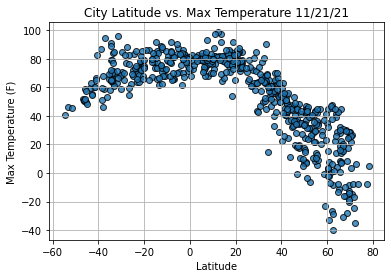

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

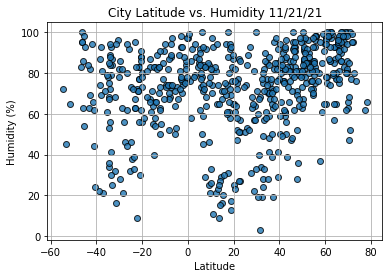

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

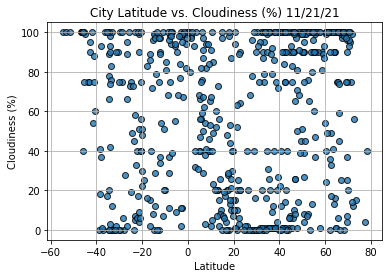

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

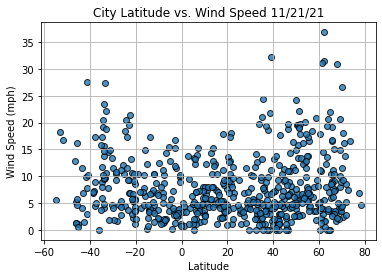

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()